# t-Distributed Stochastic Neighbor Embedding (t-SNE)

* "t-Distributed Stochastic Neighbor Embedding (t-SNE) is a technique for dimensionality reduction that is particularly well suited for the visualization of high-dimensional datasets." [#](https://lvdmaaten.github.io/tsne/)
* Helps visualy explore data sets to understand which features contribute to variance
* Observations that are similar to each other will become clustered in the visualization
* Only works with numeric data

References: 

* [Dimensionality Reduction in Python](https://campus.datacamp.com/courses/dimensionality-reduction-in-python) DataCamp Course

In [44]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [51]:
df = pd.read_csv("data/titantic-train.csv")
df["Sex"] = df["Sex"].apply(lambda sex: 1 if sex == "male" else 0)
df_numeric = df[["Age", "Fare", "Pclass", "SibSp", "Parch", "Sex"]].dropna()
display(df_numeric.head())

,Age,Fare,Pclass,SibSp,Parch,Sex
0,22.0,7.2500,3,1,0,1
1,38.0,71.2833,1,1,0,0
2,26.0,7.9250,3,0,0,0
3,35.0,53.1000,1,1,0,0
4,35.0,8.0500,3,0,0,1


In [46]:
# High learning rate makes it more adventurous, low learning rate more conservative
# Typically in 10 to 1,000 range
m = TSNE(learning_rate=50)

# Transform will project high dimensional set onto a 2d numpy array
tsne_features = m.fit_transform(df_numeric)

print(tsne_features)

[[ 25.298502   -6.457364 ]
 [-20.358843   22.225342 ]
 [ 16.847607  -14.355141 ]
 ...
 [ -0.9749923   6.1761045]
 [ -3.7415464   3.793613 ]
 [  7.6629415 -22.679783 ]]


,Age,Fare,Pclass,SibSp,Parch,Sex,x,y
0,22.0,7.2500,3,1,0,1,25.298502,-6.457364
1,38.0,71.2833,1,1,0,0,-20.358843,22.225342
2,26.0,7.9250,3,0,0,0,16.847607,-14.355141
3,35.0,53.1000,1,1,0,0,-16.084963,17.119497
4,35.0,8.0500,3,0,0,1,3.483763,-22.897518


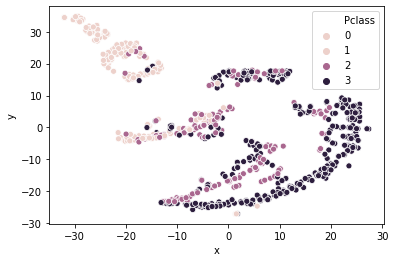

In [50]:
# We can add this back to our original data frame:

df_numeric["x"] = tsne_features[:,0]
df_numeric["y"] = tsne_features[:,1]

display(df_numeric.head())

sns.scatterplot(x="x", y="y", data=df_numeric, hue="Pclass")
plt.show()